### 加载模型

In [1]:
import torch
import torchvision
from torch2trt import TRTModule

model_trt = TRTModule()
model_trt.load_state_dict(torch.load('./Models/resnet_5M_2R_1L_1S_trt.pth'))

<All keys matched successfully>

### 初始化小车和摄像头

小车

In [2]:
from jetracer.nvidia_racecar import NvidiaRacecar
car = NvidiaRacecar()

摄像头

In [3]:
from FilesWeNeed.csi_camera import CSICamera
camera = CSICamera(width=224, height=224, capture_fps=30)

释放摄像头

In [ ]:
camera.release_camera()

In [16]:
car.throttle = 0

### 开车

In [1]:
from utils import preprocess
import numpy as np
import time 
import math

#为绘图准备数据
x_store = []
stop_store = []
straight_store = []
left_store = []
slow_store = []
speed_store = []

STEERING_GAIN = 0.75
STEERING_BIAS = -0.13

count = 0
total_time = []
while True:
    begin_time = time.time()
    count += 1
    image = camera.read()
    image = preprocess(image).half()
    output1 = model_trt(image).detach().cpu().numpy().flatten()
#     output2 = np.array(model_trt_2(image).detach().cpu().numpy().flatten())
#     if np.argmax(output2) == 0:
#         car.throttle = 0
#     else:
        
#         x = float(output1[0])
#         #car.throttle = 0.26 - abs(car.steering) * 0.04
#         car.throttle = 0.22
#         car.steering = x * STEERING_GAIN + STEERING_BIAS
#     end_time = time.time()
#     print(end_time - begin_time)
    x = float(output1[0])
    print(x)
    x_store.append(x)
    car.steering = x * STEERING_GAIN + STEERING_BIAS
    
    stop = float(output1[2])
    stop_store.append(stop)
    straight = float(output1[3])
    straight_store.append(straight)
    left = float(output1[4])
    left_store.append(left)
    slow = float(output1[5])
    slow_store.append(slow)
    speed = float(output1[6])
    speed_store.append(speed)
    
    if stop > 0.8:
        car.throttle = 0
    else:
        car.throttle = 0.16
    end_time = time.time()
    total_time.append(end_time - begin_time)


    

NameError: name 'camera' is not defined

### 耗时与帧率计算

In [18]:
sum_time = 0
for i in range(len(total_time)):
    if i>=100:
        sum_time = sum_time + total_time[i]
ave_time = sum_time / (len(total_time) - 100)

print(ave_time)

0.03339504941980889


### 图像绘制

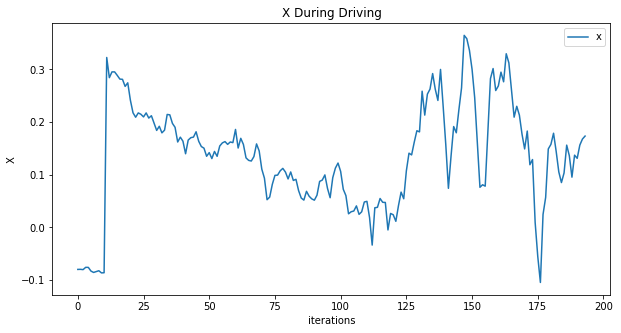

In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.figure(figsize=(10,5))
plt.title("X During Driving")
plt.plot(x_store,label="x")
plt.xlabel("iterations")
plt.ylabel("X")
plt.legend()
plt.show()

### 停车图像

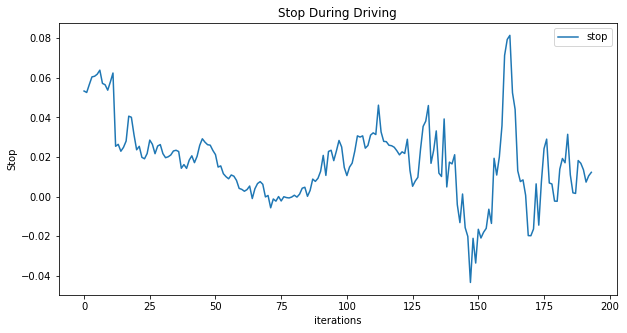

In [20]:
plt.figure(figsize=(10,5))
plt.title("Stop During Driving")
plt.plot(stop_store,label="stop")
plt.xlabel("iterations")
plt.ylabel("Stop")
plt.legend()
plt.show()

### 直走图像

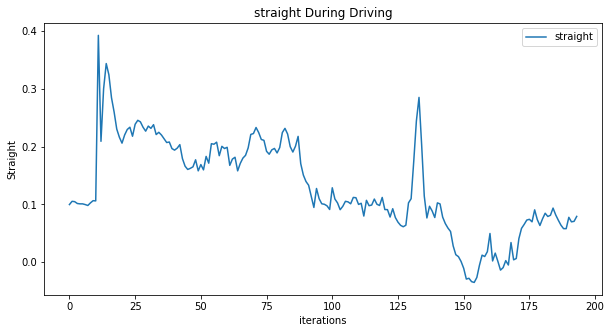

In [21]:
plt.figure(figsize=(10,5))
plt.title("straight During Driving")
plt.plot(straight_store,label="straight")
plt.xlabel("iterations")
plt.ylabel("Straight")
plt.legend()
plt.show()

### 左转图像

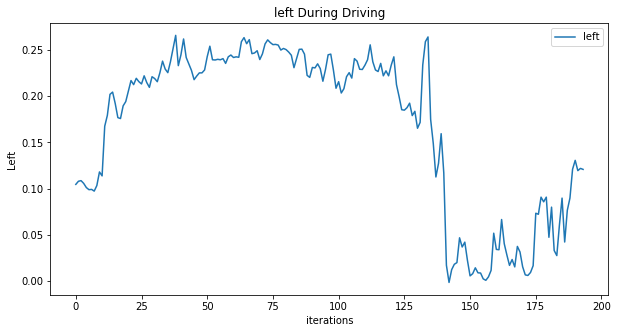

In [22]:
plt.figure(figsize=(10,5))
plt.title("left During Driving")
plt.plot(left_store,label="left")
plt.xlabel("iterations")
plt.ylabel("Left")
plt.legend()
plt.show()

### 减速图像

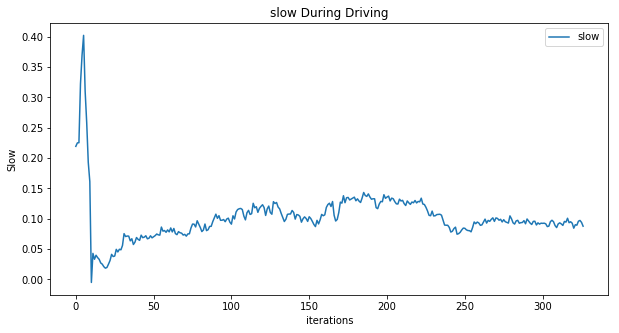

In [12]:
plt.figure(figsize=(10,5))
plt.title("slow During Driving")
plt.plot(slow_store,label="slow")
plt.xlabel("iterations")
plt.ylabel("Slow")
plt.legend()
plt.show()

### 加速图像

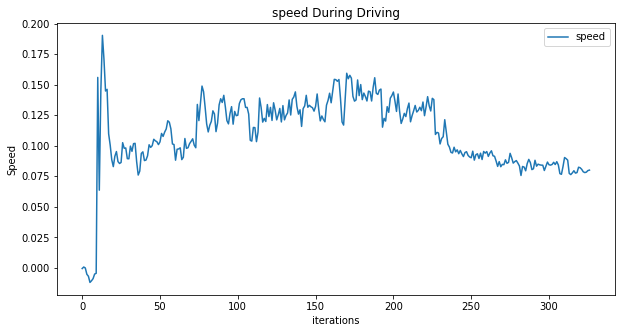

In [13]:
plt.figure(figsize=(10,5))
plt.title("speed During Driving")
plt.plot(speed_store,label="speed")
plt.xlabel("iterations")
plt.ylabel("Speed")
plt.legend()
plt.show()